# データ読み込み

In [22]:
import pandas as pd
import numpy as np

# https://www.kaggle.com/c/titanic/data より
train = pd.read_csv("./data/titanic/train.csv")
test = pd.read_csv("./data/titanic/test.csv")


# データ確認

In [9]:
train.info()
print("-------------------------------------------")
print(train.isnull().sum())
print("-------------------------------------------")
print(test.isnull().sum())
print("-------------------------------------------")
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
-------------------------------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
-------------------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age       

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 男女別人数

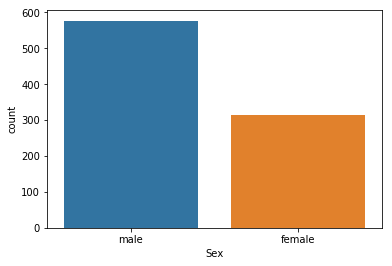

In [8]:
sns.countplot(x='Sex', data = train)

# 男女別生存率

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


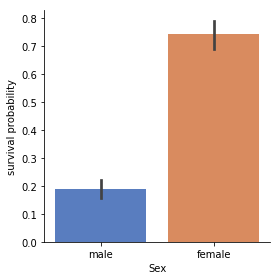

In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
g = sns.factorplot(x="Sex", y="Survived",  data=train,
                   size=4, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

# PClass別人数

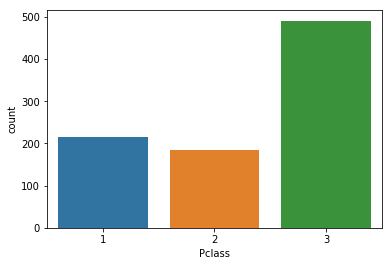

In [10]:
sns.countplot(x='Pclass', data = train)

# PClass別生存率

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


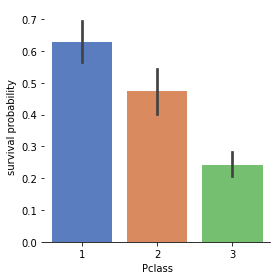

In [11]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
g = sns.factorplot(x="Pclass", y="Survived",  data=train,
                   size=4, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

# 生存率に対する相関

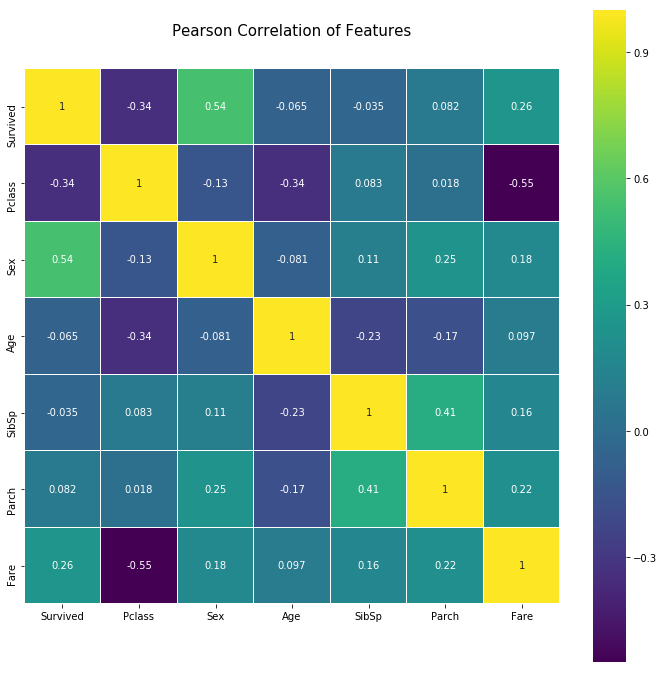

In [27]:

train2 = train.copy()

# 欠損値を中央値で埋める
train2.Age = train.Age.fillna(train.Age.median())
# 0, 1に変換
train2.Sex = train.Sex.replace(['male', 'female'], [0, 1])
del train2['PassengerId']
del train2['Name']
del train2['Ticket']
del train2['Cabin']
del train2['Embarked']


colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)

sns.heatmap(train2.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)


<Figure size 432x288 with 0 Axes>

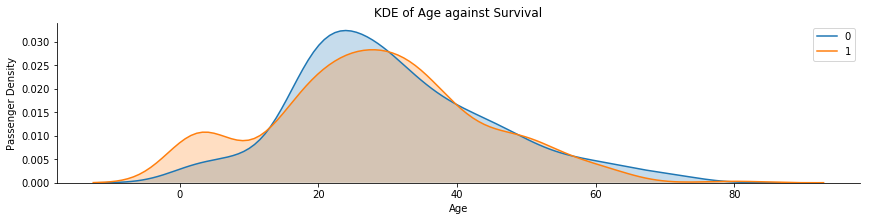

In [32]:
plt.figure()
sns.FacetGrid(data=train, hue="Survived", aspect=4).map(sns.kdeplot, "Age", shade=True)
plt.ylabel('Passenger Density')
plt.title('KDE of Age against Survival')
plt.legend()